In [2]:


%load_ext autoreload
%autoreload 2
%matplotlib inline
import torch 
import numpy as np
from PIL import Image
from torchvision import transforms
import pandas as pd 
import json 
import copy 
import pickle 
import os 
import sys
import copy
import umap
import wandb
from pytorch_lightning.loggers import WandbLogger
import seaborn as sns

import matplotlib.pyplot as plt
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
sys.path.append('../py_scripts')
from py_scripts import LightningDataModule, get_params_net_dataloader
import glob
import pickle
import torch.nn.functional as F
from diffusion_utils import *

# DONT NEED TO USE GPU HERE

use_gpu = False

if use_gpu: 
    os.environ["CUDA_VISIBLE_DEVICES"] = "1"

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
else: 
    device="cpu"



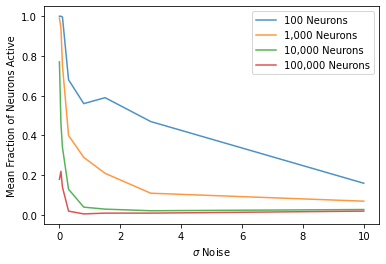

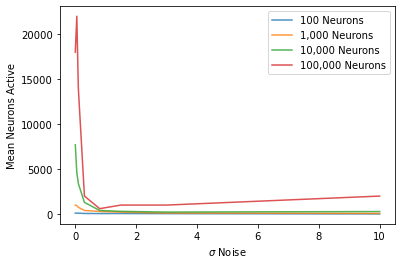

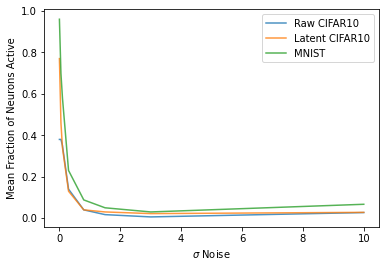

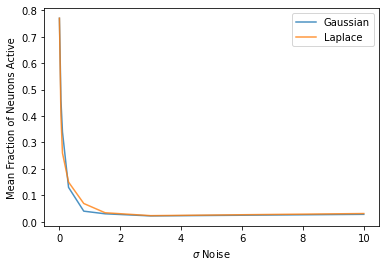

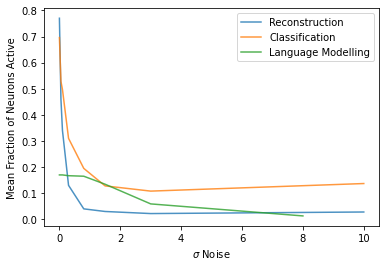

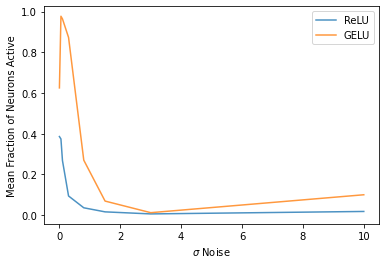

In [4]:
#sns.set_theme()

noises = [0.0, 0.05, 0.1, 0.3, 0.8, 1.5, 3.0, 10.0]
d = {
    '100 Neurons' : [0.999, 0.999, 0.995, 0.68, 0.56, 0.59, 0.47, 0.16 ],
    '1,000 Neurons' : [0.99, 0.94, 0.75, 0.40, 0.29,  0.21, 0.11, 0.07],
    '10,000 Neurons':[0.77, 0.46, 0.34, 0.13, 0.04, 0.03, 0.022, 0.028],
    '100,000 Neurons' : [0.18, 0.22, 0.14, 0.02, 0.006, 0.01, 0.01, 0.02]
}

for k, v in d.items():
    plt.plot(noises, v, label=k ,alpha=0.8 )
plt.legend()
plt.xlabel("$\sigma$ Noise")
plt.ylabel("Mean Fraction of Neurons Active")
plt.gcf().savefig(f'figs/train_ablations/{"VaryingNNeurons"}.png', dpi=250)
plt.show()

for k, v in d.items():
    plt.plot(noises, np.asarray(v)*int(k.replace(",","").replace(" Neurons", "")), label=k ,alpha=0.8 )
plt.legend()
plt.xlabel("$\sigma$ Noise")
plt.ylabel("Mean Neurons Active")
plt.show()


####################
dd ={
    "Raw CIFAR10": [0.38, 0.38, 0.35, 0.14, 0.04, 0.017, 0.006, 0.027],
    "Latent CIFAR10": [0.77, 0.46, 0.34, 0.13, 0.04, 0.03, 0.022, 0.028],
    "MNIST": [0.96, 0.698, 0.58, 0.23, 0.088, 0.05, 0.03, 0.067],
}

for k, v in dd.items():
    plt.plot(noises, v, label=k ,alpha=0.8 )
plt.legend()
plt.xlabel("$\sigma$ Noise")
plt.ylabel("Mean Fraction of Neurons Active")
plt.gcf().savefig(f'figs/train_ablations/{"VaryingDataset"}.png', dpi=250)
plt.show()

#########

dist_d = {
    "Gaussian": [0.77, 0.46, 0.34, 0.13, 0.04, 0.03, 0.022, 0.028],
    "Laplace": [0.77, 0.40, 0.26, 0.15, 0.069, 0.034, 0.023, 0.031],
    #"Exponential*": [0.74, 0.467, 0.286, 0.11, 0.03, 0.011, 0.003, 0.004] ,
    #"Poisson*": [0.75, 0.40, 0.37, 0.32, 0.09, 0.024, 0.011, 0.003],
}

for k, v in dist_d.items():
    plt.plot(noises, v, label=k ,alpha=0.8 )
plt.legend()
plt.xlabel("$\sigma$ Noise")
plt.ylabel("Mean Fraction of Neurons Active")
plt.gcf().savefig(f'figs/train_ablations/{"VaryingNoiseDist"}.png', dpi=250)
plt.show()

####

task_d = {
    "Reconstruction": (noises, [0.77, 0.46, 0.34, 0.13, 0.04, 0.03, 0.022, 0.028],),
    "Classification": (noises, [0.696, 0.528, 0.497, 0.31, 0.195, 0.128, 0.108, 0.137]) ,
    "Language Modelling": ([0.0, 0.05, 0.1, 0.3, 0.8, 1.5, 3.0, 8.0],[0.17, 0.17, 0.17, 0.167, 0.165, 0.1344, 0.059, 0.013])
}

for k, v in task_d.items():
    n, v  = v
    plt.plot(n, v, label=k ,alpha=0.8 )
plt.legend()
plt.xlabel("$\sigma$ Noise")
plt.ylabel("Mean Fraction of Neurons Active")
plt.gcf().savefig(f'figs/train_ablations/{"VaryingTask"}.png', dpi=250)
plt.show()

####

# CIFAR10

activ_d = {
    "ReLU": (noises, [0.386,0.374,0.268,0.094, 0.036,0.016, 0.0059, 0.018],),
    "GELU": (noises, [0.625, 0.977, 0.964, 0.873, 0.27, 0.069, 0.012, 0.10]) ,
    #"Sigmoid": (noises, [])
}

for k, v in activ_d.items():
    n, v  = v
    plt.plot(n, v, label=k ,alpha=0.8 )
plt.legend()
plt.xlabel("$\sigma$ Noise")
plt.ylabel("Mean Fraction of Neurons Active")
plt.gcf().savefig(f'figs/train_ablations/{"VaryingAct_CIFAR10"}.png', dpi=250)
plt.show()